In [1]:
%env CONSOLE_WIDTH=140

from kiara.interfaces.python_api.workflow import Workflow
from kiara.utils.jupyter import graph_to_image
from kiara.utils.cli import terminal_print_model

env: CONSOLE_WIDTH=140


# Creating the workflow object <a class="anchor" id="create_workflow_obj"></a>

As the first step we create a [`Workflow`](https://dharpa.org/kiara/latest/reference/kiara/interfaces/python_api/workflow/) object, which is a convenience class that manages workflow state, internal consistency and history for us:

In [2]:
doc = """Example topic-modeling end-to-end workflow."""
workflow = Workflow.create("topic_modeling", doc=doc, replace_existing_alias=True)

# Assembling the workflow <a class="anchor" id="assembly"></a>

The first step in the creation of our workflow is to create the individual steps from the available *kiara* modules.

A list of available modules and their aliases can be found here: TODO

## Creating the steps of the workflow <a class="anchor" id="creating_steps"></a>

In [3]:
# Creating step: import_text_corpus
workflow.add_step(operation="import.file_bundle", step_id="import_text_corpus")

╭─ Step: import_text_corpus ───────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       import_text_corpus                                                                                                       │
│   module type   import.file_bundle                                                                                                       │
│   module doc    Import a folder (file_bundle) from the local filesystem.                                                                 │
│   inputs                                                                                                                                 │
│                   field name                type     description                                         Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   import_text_corpus.path   string   The local path of the folder to import.             yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name                       type          description                                                             │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   import_text_corpus.file_bundle   file_bundle   The imported file bundle.                                               │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [4]:
# Creating step: create_stopwords_list
workflow.add_step(operation="create.stopwords_list", step_id="create_stopwords_list")

╭─ Step: create_stopwords_list ────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       create_stopwords_list                                                                                                    │
│   module type   create.stopwords_list                                                                                                    │
│   module doc    Create a list of stopwords from one or multiple sources.                                                                 │
│                                                                                                                                          │
│                 This will download nltk stopwords if necessary, and merge all input lists into a single, sorted list without             │
│                 duplicates.                                                                                                              │
│   inputs                                                                                                                                 │
│                   field name                             type   description                              Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   create_stopwords_list.languages        list   A list of languages, will be used to     no         -- no default --     │
│                                                                 retrieve language-specific stopword                                      │
│                                                                 from nltk.                                                               │
│                   create_stopwords_list.stopword_lists   list   A list of lists of stopwords.            no         -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name                             type   description                                                              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   create_stopwords_list.stopwords_list   list   A sorted list of unique stopwords.                                       │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [5]:
# Creating step: create_text_corpus
step_create_text_corpus_config = {'constants': {}, 'defaults': {}, 'source_type': 'text_file_bundle', 'target_type': 'table', 'ignore_errors': False}
workflow.add_step(
    operation="create.table",
    module_config=step_create_text_corpus_config,
    step_id="create_text_corpus")

╭─ Step: create_text_corpus ───────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         create_text_corpus                                                                                                     │
│   module type     create.table                                                                                                           │
│   module_config   {                                                                                                                      │
│                     "source_type": "text_file_bundle",                                                                                   │
│                     "target_type": "table",                                                                                              │
│                     "ignore_errors": false                                                                                               │
│                   }                                                                                                                      │
│   module doc      -- n/a --                                                                                                              │
│   inputs                                                                                                                                 │
│                     field name                       type               description                      Required   Default              │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     create_text_corpus.text_file_b   text_file_bundle   The type of the source value.    yes        -- no default --     │
│                     undle                                                                                                                │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                     field name                 type    description                                                                       │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                     create_text_corpus.table   table   The result value.                                                                 │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [6]:
# Connecting input(s) of step 'create_text_corpus'
workflow.connect_fields("create_text_corpus.text_file_bundle", "import_text_corpus.file_bundle")

In [7]:
# Creating step: extract_texts_column
workflow.add_step(operation="table.cut_column", step_id="extract_texts_column")

╭─ Step: extract_texts_column ─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       extract_texts_column                                                                                                     │
│   module type   table.cut_column                                                                                                         │
│   module doc    Cut off one column from a table, returning an array.                                                                     │
│   inputs                                                                                                                                 │
│                   field name                         type     description                                Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   extract_texts_column.table         table    A table.                                   yes        -- no default --     │
│                   extract_texts_column.column_name   string   The name of the column to extract.         yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name                   type    description                                                                       │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   extract_texts_column.array   array   The column.                                                                       │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
# Connecting input(s) of step 'extract_texts_column'
workflow.connect_fields("extract_texts_column.table", "create_text_corpus.table")

In [9]:
# Creating step: extract_filename_column
workflow.add_step(operation="table.cut_column", step_id="extract_filename_column")

╭─ Step: extract_filename_column ──────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       extract_filename_column                                                                                                  │
│   module type   table.cut_column                                                                                                         │
│   module doc    Cut off one column from a table, returning an array.                                                                     │
│   inputs                                                                                                                                 │
│                   field name                            type     description                             Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   extract_filename_column.table         table    A table.                                yes        -- no default --     │
│                   extract_filename_column.column_name   string   The name of the column to extract.      yes        -- no default --     │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name                      type    description                                                                    │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   extract_filename_column.array   array   The column.                                                                    │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [10]:
# Connecting input(s) of step 'extract_filename_column'
workflow.connect_fields("extract_filename_column.table", "create_text_corpus.table")

In [11]:
# Creating step: create_date_array
workflow.add_step(operation="parse.date_array", step_id="create_date_array")

╭─ Step: create_date_array ────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id         create_date_array                                                                                                      │
│   module type     parse.date_array                                                                                                       │
│   module_config   {                                                                                                                      │
│                     "add_inputs": true,                                                                                                  │
│                     "input_fields": [],                                                                                                  │
│                     "force_non_null": true,                                                                                              │
│                     "min_index": null,                                                                                                   │
│                     "max_index": null,                                                                                                   │
│                     "remove_tokens": []                                                                                                  │
│                   }                                                                                                                      │
│   module doc      Create an array of date objects from an array of strings.                                                              │
│                                                                                                                                          │
│                   This module is very simplistic at the moment, more functionality and options will be added in the future.              │
│                                                                                                                                          │
│                   At its core, this module uses the standard parser from the ]8;id=222305;https://github.com/dateutil/dateutil\dateutil]8;;\ package to parse strings into dates. As this       │
│                   parser can't handle complex strings, the input strings can be pre-processed in the following ways:                     │
│                                                                                                                                          │
│                    • 'cut' non-relevant parts of the string (using 'min_index' & 'max_index' input/config options)                       │
│                    • remove matching tokens from the string, and replace them with a single whitespace (using the 'remove_tokens'        │
│                      option)                                                                                                             │
│                                                                                                                                          │
│                   By default, if an input string can't be parsed this module will raise an exception. This can be prevented by setting   │
│                   this modules 'force_non_null' config option or input to 'False', in which case un-parsable strings will appear as      │
│                   'NULL' value in the resulting array.                                                                                   │
│   inputs                                                                                                                                 │
│                     field name                         type      description                             Required   Default         

In [12]:
# Connecting input(s) of step 'create_date_array'
workflow.connect_fields("create_date_array.array", "extract_filename_column.array")

In [13]:
# Creating step: tokenize_content
workflow.add_step(operation="tokenize.texts_array", step_id="tokenize_content")

╭─ Step: tokenize_content ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       tokenize_content                                                                                                         │
│   module type   tokenize.texts_array                                                                                                     │
│   module doc    Split sentences into words or words into characters.                                                                     │
│                                                                                                                                          │
│                 In other words, this operation establishes the word boundaries (i.e., tokens) a very helpful way of finding patterns.    │
│                 It is also the typical step prior to stemming and lemmatization                                                          │
│   inputs                                                                                                                                 │
│                   field name                          type      description                              Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   tokenize_content.texts_array        array     An array of text items to be             yes        -- no default --     │
│                                                                 tokenized.                                                               │
│                   tokenize_content.tokenize_by_word   boolean   Whether to tokenize by word (default),   no         True                 │
│                                                                 or character.                                                            │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name                      type    description                                                                    │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   tokenize_content.tokens_array   array   The tokenized content, as an array of lists of strings.                        │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [14]:
# Connecting input(s) of step 'tokenize_content'
workflow.connect_fields("tokenize_content.texts_array", "extract_texts_column.array")

In [15]:
# Creating step: preprocess_corpus
workflow.add_step(operation="preprocess.tokens_array", step_id="preprocess_corpus")

╭─ Step: preprocess_corpus ────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       preprocess_corpus                                                                                                        │
│   module type   preprocess.tokens_array                                                                                                  │
│   module doc    Preprocess lists of tokens, incl. lowercasing, remove special characers, etc.                                            │
│                                                                                                                                          │
│                 Lowercasing: Lowercase the words. This operation is a double-edged sword. It can be effective at yielding potentially    │
│                 better results in the case of relatively small datasets or datatsets with a high percentage of OCR mistakes. For         │
│                 instance, if lowercasing is not performed, the algorithm will treat USA, Usa, usa, UsA, uSA, etc. as distinct tokens,    │
│                 even though they may all refer to the same entity. On the other hand, if the dataset does not contain such OCR           │
│                 mistakes, then it may become difficult to distinguish between homonyms and make interpreting the topics much harder.     │
│                                                                                                                                          │
│                 Removing stopwords and words with less than three characters: Remove low information words. These are typically words    │
│                 such as articles, pronouns, prepositions, conjunctions, etc. which are not semantically salient. There are numerous      │
│                 stopword lists available for many, though not all, languages which can be easily adapted to the individual               │
│                 researcher's needs. Removing words with less than three characters may additionally remove many OCR mistakes. Both       │
│                 these operations have the dual advantage of yielding more reliable results while reducing the size of the dataset,       │
│                 thus in turn reducing the required processing power. This step can therefore hardly be considered optional in TM.        │
│                                                                                                                                          │
│                 Noise removal: Remove elements such as punctuation marks, special characters, numbers, html formatting, etc. This        │
│                 operation is again concerned with removing elements that may not be relevant to the text analysis and in fact            │
│                 interfere with it. Depending on the dataset and research question, this operation can become essential.                  │
│   inputs                                                                                                                                 │
│                   field name                            type      description                            Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   preprocess_corpus.tokens_array        array     The tokens array to pre-process.       yes        -- no default --     │
│                   preprocess_corpus.to_lowercase        boolean   Apply lowercasing to the text.         no         False                │
│                   preprocess_corpus.remove_alphanumer   boolean   Remove all tokens that include         no         False                │
│                   ic                              

In [16]:
# Connecting input(s) of step 'preprocess_corpus'
workflow.connect_fields("preprocess_corpus.tokens_array", "tokenize_content.tokens_array")
workflow.connect_fields("preprocess_corpus.remove_stopwords", "create_stopwords_list.stopwords_list")

In [17]:
# Creating step: generate_lda
workflow.add_step(operation="generate.LDA.for.tokens_array", step_id="generate_lda")

╭─ Step: generate_lda ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   step_id       generate_lda                                                                                                             │
│   module type   generate.LDA.for.tokens_array                                                                                            │
│   module doc    Perform Latent Dirichlet Allocation on a tokenized corpus.                                                               │
│                                                                                                                                          │
│                 This module computes models for a range of number of topics provided by the user.                                        │
│   inputs                                                                                                                                 │
│                   field name                       type      description                                 Required   Default              │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   generate_lda.tokens_array        array     The text corpus.                            yes        -- no default --     │
│                   generate_lda.num_topics_min      integer   The minimal number of topics.               no         7                    │
│                   generate_lda.num_topics_max      integer   The max number of topics.                   no         -- no default --     │
│                   generate_lda.compute_coherence   boolean   Whether to compute the coherence score      no         False                │
│                                                              for each model.                                                             │
│                   generate_lda.words_per_topic     integer   How many words per topic to put in the      no         10                   │
│                                                              result model.                                                               │
│                                                                                                                                          │
│   outputs                                                                                                                                │
│                   field name                     type    description                                                                     │
│                  ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    │
│                   generate_lda.topic_models      dict    A dictionary with one coherence model table for each number of topics.          │
│                   generate_lda.coherence_table   table   Coherence details.                                                              │
│                   generate_lda.coherence_map     dict    A map with the coherence value for every number of topics.                      │
│                                                                                                                                          │
│                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [18]:
# Connecting input(s) of step 'generate_lda'
workflow.connect_fields("generate_lda.tokens_array", "preprocess_corpus.tokens_array")

## Setting workflow input/output names (optional)

To make our workflow nicer to use, we can set aliases for its inputs and outputs.

In [19]:
workflow.set_input_alias(input_field="extract_texts_column.column_name", alias="content_column_name")
workflow.set_input_alias(input_field="extract_filename_column.column_name", alias="filename_column_name")
workflow.set_input_alias(input_field="import_text_corpus.path", alias="text_corpus_folder_path")
workflow.set_input_alias(input_field="create_date_array.min_index", alias="date_parse_min")
workflow.set_input_alias(input_field="create_date_array.max_index", alias="date_parse_max")
workflow.set_input_alias(input_field="create_date_array.force_non_null", alias="date_force_non_null")
workflow.set_input_alias(input_field="create_date_array.remove_tokens", alias="date_remove_tokensl")
workflow.set_input_alias(input_field="tokenize_content.tokenize_by_word", alias="tokenize_by_word")
workflow.set_input_alias(input_field="generate_lda.num_topics_min", alias="num_topics_min")
workflow.set_input_alias(input_field="generate_lda.num_topics_max", alias="num_topics_max")
workflow.set_input_alias(input_field="generate_lda.compute_coherence", alias="compute_coherence")
workflow.set_input_alias(input_field="generate_lda.words_per_topic", alias="words_per_topic")
workflow.set_input_alias(input_field="create_stopwords_list.languages", alias="languages")
workflow.set_input_alias(input_field="create_stopwords_list.stopword_lists", alias="stopword_lists")
workflow.set_input_alias(input_field="preprocess_corpus.to_lowercase", alias="to_lowercase")
workflow.set_input_alias(input_field="preprocess_corpus.remove_alphanumeric", alias="remove_alphanumeric")
workflow.set_input_alias(input_field="preprocess_corpus.remove_non_alpha", alias="remove_non_alpha")
workflow.set_input_alias(input_field="preprocess_corpus.remove_all_numeric", alias="remove_all_numeric")
workflow.set_input_alias(input_field="preprocess_corpus.remove_short_tokens", alias="remove_short_tokens")
workflow.set_input_alias(input_field="preprocess_corpus.remove_stopwords", alias="remove_stopwords")


workflow.set_output_alias(output_field="import_text_corpus.file_bundle", alias="text_corpus_file_bundle")
workflow.set_output_alias(output_field="create_text_corpus.table", alias="text_corpus_table")
workflow.set_output_alias(output_field="extract_texts_column.array", alias="content_array")
workflow.set_output_alias(output_field="tokenize_content.tokens_array", alias="tokenized_corpus")
workflow.set_output_alias(output_field="preprocess_corpus.tokens_array", alias="preprocessed_corpus")
workflow.set_output_alias(output_field="generate_lda.topic_models", alias="topic_models")
workflow.set_output_alias(output_field="generate_lda.coherence_map", alias="coherence_map")
workflow.set_output_alias(output_field="generate_lda.coherence_table", alias="coherence_table")
workflow.set_output_alias(output_field="create_date_array.date_array", alias="date_array")

# Workflow information <a class="anchor" id="pipeline_info"></a>

After our workflow is wired up, we look can look at its structure, and other properties.


## Workflow status

A workflow consists of a series of 'states', the most relevant is always the most recent one. We can investigate
that latest states details like so:

In [20]:
workflow.current_state

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuAuzjRbxHaGKvGVJ7rxJQ27Hfy2k7qLTxC3vxowNLwnH4U                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name                               status    required   default   value id                                     │
│                    ──────────────────────────────────────────────────────────────────────────────────────────────────────────────        │
│                     create_stopwords_list__languages         valid     no                   00000000-0000-0000-0000-000000000001         │
│                     create_stopwords_list__stopword_lists    valid     no                   00000000-0000-0000-0000-000000000001         │
│                     import_text_corpus__path                 not set   yes                  00000000-0000-0000-0000-000000000001         │
│                     extract_filename_column__column_name     not set   yes                  00000000-0000-0000-0000-000000000001         │
│                     extract_texts_column__column_name        not set   yes                  00000000-0000-0000-0000-000000000001         │
│                     create_date_array__force_non_null        valid     no         True      00000000-0000-0000-0000-000000000001         │
│                     create_date_array__max_index             valid     no                   00000000-0000-0000-0000-000000000001         │
│                     create_date_array__min_index             valid     no                   00000000-0000-0000-0000-000000000001         │
│                     create_date_array__remove_tokens         valid     no         []        00000000-0000-0000-0000-000000000001         │
│                     tokenize_content__tokenize_by_word       valid     no         True      00000000-0000-0000-0000-000000000001         │
│                     preprocess_corpus__remove_all_numeric    valid     no         False     00000000-0000-0000-0000-000000000001         │
│                     preprocess_corpus__remove_alphanumeric   valid     no         False     00000000-0000-0000-0000-000000000001         │
│                     preprocess_corpus__remove_non_alpha      valid     no         False     00000000-0000-0000-0000-000000000001         │
│                     preprocess_corpus__remove_short_tokens   valid     no         False     00000000-0000-0000-0000-000000000001         │
│                     preprocess_corpus__to_lowercase          valid     no         False     00000000-0000-0000-0000-000000000001         │
│                     generate_lda__compute_coherence          valid     no         False     00000000-0000-0000-0000-000000000001         │
│                     generate_lda__num_topics_max             valid     no                   00000000-0000-0000-0000-000000000001         │
│                     generate_lda__num_topics_min             valid     no         7         00000000-0000-0000-0000-000000000001         │
│                     generate_lda__words_per_topic            valid     no         10        00000000-0000-0000-0000-000000000001         │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: create_stopwords_l

## Pipeline execution graph

Let's look at the current execution graph for the current workflow pipeline:

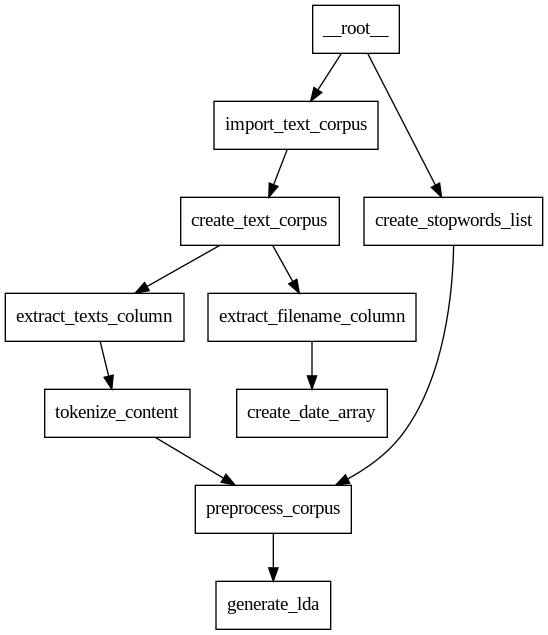

In [21]:
graph_to_image(workflow.pipeline.execution_graph)

# Workflow inputs <a class="anchor" id="pipeline_inputs"></a>

Once a workflow has an assembled pipeline, we can set it's inputs. We use the input field
names that we got from the result of the `workflow.current_state` call.

In [22]:
workflow.set_input("text_corpus_folder_path", "/home/markus/projects/kiara/dev/kiara.examples/examples/pipelines/topic_modeling/../../data/text_corpus/data")
workflow.set_input("content_column_name", "content")
workflow.set_input("filename_column_name", "file_name")
workflow.set_input("date_force_non_null", None)
workflow.set_input("date_parse_min", 11)
workflow.set_input("date_parse_max", 21)
workflow.set_input("date_remove_tokensl", None)
workflow.set_input("tokenize_by_word", None)
workflow.set_input("languages", ['italian'])
workflow.set_input("stopword_lists", [])
workflow.set_input("to_lowercase", None)
workflow.set_input("remove_alphanumeric", None)
workflow.set_input("remove_non_alpha", None)
workflow.set_input("remove_all_numeric", None)
workflow.set_input("remove_short_tokens", None)
workflow.set_input("num_topics_min", None)
workflow.set_input("num_topics_max", 7)
workflow.set_input("compute_coherence", None)
workflow.set_input("words_per_topic", None)


# process all workflow steps that can be processed
workflow.process_steps()

# print the current state, after we set our inputs
workflow.current_state

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuApp9ZK2we6s6wUzbABia7x7RDdeYF2bwu5YaM24Nz8VoA                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name                               status   required   default   value id                                      │
│                    ─────────────────────────────────────────────────────────────────────────────────────────────────────────────         │
│                     create_stopwords_list__languages         valid    no                   c00fd384-97e9-4897-aaa2-a063c5fd7266          │
│                     create_stopwords_list__stopword_lists    valid    no                   a133df7f-d41e-4336-9e47-8d73f32e547d          │
│                     import_text_corpus__path                 valid    yes                  e63596f6-4806-42d3-b78b-10a8b73101a9          │
│                     extract_filename_column__column_name     valid    yes                  34002be6-cdbe-4666-9e9e-77bb81bbf780          │
│                     extract_texts_column__column_name        valid    yes                  44996c4c-74a4-4015-89f7-e3b893a53a10          │
│                     create_date_array__force_non_null        valid    no         True      00000000-0000-0000-0000-000000000002          │
│                     create_date_array__max_index             valid    no                   2efe92a5-86ce-481e-884c-db1a14111d9e          │
│                     create_date_array__min_index             valid    no                   f675796a-3213-408f-a269-740d0e77252f          │
│                     create_date_array__remove_tokens         valid    no         []        00000000-0000-0000-0000-000000000002          │
│                     tokenize_content__tokenize_by_word       valid    no         True      00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_all_numeric    valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_alphanumeric   valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_non_alpha      valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_short_tokens   valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__to_lowercase          valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     generate_lda__compute_coherence          valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     generate_lda__num_topics_max             valid    no                   f27d762c-7fd2-45b6-89a6-e52659773d46          │
│                     generate_lda__num_topics_min             valid    no         7         00000000-0000-0000-0000-000000000002          │
│                     generate_lda__words_per_topic            valid    no         10        00000000-0000-0000-0000-000000000002          │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: create_stopwords_l

# Workflow outputs <a class="anchor" id="pipeline_outputs"></a>

To print the actual data of the workflows' current outputs, we call the `current_output_values` property of the workflow object:

In [23]:
workflow.current_output_values

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│   field                     value                                                                                                        │
│  ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────  │
│   coherence_map             -- none/not set --                                                                                           │
│   coherence_table           -- none/not set --                                                                                           │
│   content_array                                                                                                                          │
│                               LA RAGIONE                                                                                                 │
│                               LA RAG ONE                                                                                                 │
│                               LA RAGIONE                                                                                                 │
│                               contro i vili, i camorristi, i sicari, i falsari e gli austriacanti, nemici dell ...                       │
│                               contro i vili, i camorristi, i sicari, i falsari e gli austriacanti, nemici dell ...                       │
│                               LA RAGIONA                                                                                                 │
│                               LA RAGIONE                                                                                                 │
│                               LA RAGIONE                                                                                                 │
│                               contro i vili, i camorristi, i sicari, i falsari e gli austriacanti, nemici dell ...                       │
│                               LA RAG ONE                                                                                                 │
│                               contro 1 vili, i camorristi, i sicari, i falsari e gli austriacanti, nemici dell ...                       │
│                               ■■■                                                                                                        │
│                               La Rassegna                                                                                                │
│                               Both Phones                                                                                                │
│                               ■ jSrìt** W?? iIK 38®f- i^M                                                                                │
│                               ■Both Phones                                                                                               │
│                                                                                                                                          │
│   date_array                                                                                                                             │
│                               1917-04-25 00:00:00                                                                                        │
│                               1917-04-25 00:00:00                                                                                        │
│                               1917-04-25 00:00:00                                                                                        │
│                               1917-04-25 00:00:00 

# Workflow snapshot <a class="anchor" id="snapshot"></a>

So far, our workflow only exists in memory. If we want to save it so we can have a look at it again at a later stage, we can snapshot the current state, which will save the current structure of the internal pipeline, as well as all inputs that are currently used. In addition, this will register the workflow under the alias we specified on top of this file when creating the `Workflow` object (in our case: `topic_modeling`).

If we would not not specify `save=True`, the structure of the pipeline and inputs would still be frozen and kept, but only in memory, and we'd only be able to access it in our current session.

In [24]:
workflow.snapshot(save=True)

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  state id         zdpuApp9ZK2we6s6wUzbABia7x7RDdeYF2bwu5YaM24Nz8VoA                                                                      │
│  pipeline inputs                                                                                                                         │
│                     field name                               status   required   default   value id                                      │
│                    ─────────────────────────────────────────────────────────────────────────────────────────────────────────────         │
│                     create_stopwords_list__languages         valid    no                   c00fd384-97e9-4897-aaa2-a063c5fd7266          │
│                     create_stopwords_list__stopword_lists    valid    no                   a133df7f-d41e-4336-9e47-8d73f32e547d          │
│                     import_text_corpus__path                 valid    yes                  e63596f6-4806-42d3-b78b-10a8b73101a9          │
│                     extract_filename_column__column_name     valid    yes                  34002be6-cdbe-4666-9e9e-77bb81bbf780          │
│                     extract_texts_column__column_name        valid    yes                  44996c4c-74a4-4015-89f7-e3b893a53a10          │
│                     create_date_array__force_non_null        valid    no         True      00000000-0000-0000-0000-000000000002          │
│                     create_date_array__max_index             valid    no                   2efe92a5-86ce-481e-884c-db1a14111d9e          │
│                     create_date_array__min_index             valid    no                   f675796a-3213-408f-a269-740d0e77252f          │
│                     create_date_array__remove_tokens         valid    no         []        00000000-0000-0000-0000-000000000002          │
│                     tokenize_content__tokenize_by_word       valid    no         True      00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_all_numeric    valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_alphanumeric   valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_non_alpha      valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__remove_short_tokens   valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     preprocess_corpus__to_lowercase          valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     generate_lda__compute_coherence          valid    no         False     00000000-0000-0000-0000-000000000002          │
│                     generate_lda__num_topics_max             valid    no                   f27d762c-7fd2-45b6-89a6-e52659773d46          │
│                     generate_lda__num_topics_min             valid    no         7         00000000-0000-0000-0000-000000000002          │
│                     generate_lda__words_per_topic            valid    no         10        00000000-0000-0000-0000-000000000002          │
│                                                                                                                                          │
│  steps            steps                                                                                                                  │
│                   ├── stage: 1                                                                                                           │
│                   │   ├── step: create_stopwords_l

Now, we can access our workflow in other environments, for example from the commandline:

In [25]:
! kiara workflow list


                                                                                                                                            
  alias(es)        workflow_id                            # steps   # stages   # states   description                                       
 ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  a2               08a53df4-9ea8-480e-9691-1cf9b868fc0c   2         2          1          -- n/a --                                         
  logic.xor        0ede1f36-f330-4e1b-8536-761e33f0cc83   3         2          1          Returns 'True' if exactly one of it's two inputs  
                                                                                          is 'True'.                                        
  topic-modeling   b5cdc05f-86a1-4c62-a2c3-1a854ce454b5   9         6          1          -- n/a --                                         
  topic_mode

In [26]:
! kiara workflow explain topic_modeling

╭─ Workflow: topic_modeling ───────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                          │
│  documentation                                                                                                                           │
│                          Example topic-modeling end-to-end workflow.                                                                     │
│                                                                                                                                          │
│  author(s)                                                                                                                               │
│                                                                                                                                          │
│  workflow i